# Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#1-predictor" data-toc-modified-id="1-predictor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1 predictor</a></span></li></ul></li></ul></div>

In [7]:
import pandas as pd

import seaborn as sns

 * Regression models are used when the target variable is **quantitative**: 
  - salaries
  - gas emissions
  - age of person in a picture
  - ...
 * **Classification** models are used when the target variable is **qualitative**: 
  - surviving (or not) the Titanic
  - paying back (or not) a loan
  - identifying a dog (or not) in a picture
  - deciding which one of 3 plant species is this one
  - ...

Metrics are specially important in classification problems!

You must understand the business goal in order to choose the appropiate metric.

## Data exploration

In [47]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [49]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [50]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

I do not like spaces in column names...

In [51]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [52]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

Target variable is `is_cancer`  
It is a categorical variable, taking possible values $0$ and $1$

In [53]:
df.is_cancer.sample(10)

550    0
377    0
557    0
372    1
458    0
379    1
136    0
69     0
186    1
437    0
Name: is_cancer, dtype: int64

<AxesSubplot:xlabel='is_cancer', ylabel='count'>

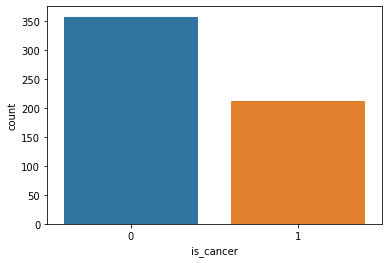

In [54]:
sns.countplot(x=df.is_cancer)

## Logistic regression

Logistic regression:
 * is the most frequently used classification algorithm
 * (binary classification) predicts a **probability** $p$ for class $1$ (`True`), and $1-p$ for class $0$ (`False`) 
 * (multi classification) predicts a **probability** for every class

### 1 predictor

Lets try to predict `is_cancer` using only as a predictor `mean_radius`

<AxesSubplot:xlabel='mean_perimeter', ylabel='is_cancer'>

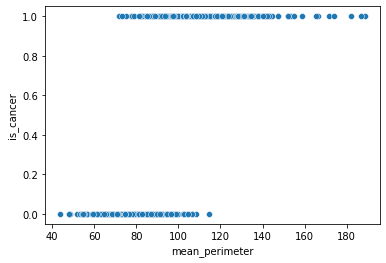

In [55]:
sns.scatterplot(x=df.mean_perimeter, y=df.is_cancer)

In [33]:
df2 = df[["mean_radius", "is_cancer"]]

In [38]:
df2.sample(10).sort_values("mean_radius")

,mean_radius,is_cancer
21,9.504,1
537,11.690,1
160,11.750,1
5,12.450,0
497,12.470,1
76,13.530,1
439,14.020,1
190,14.220,0
141,16.110,0
202,23.290,0


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()

In [ ]:
log.fit(X=)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [ ]:
# training your model on the training datasets -> where the algorithm will learn
model = model.fit(X_train, y_train)

In [ ]:
# the natural thing to do is to perform an evaluation of how well our model behaves with test data

#model.predict(X_test)
#np.subtract(model.predict(X_test),y_test)

# once the model is trained you can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",model.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", model.score(X_train, y_train))


test data accuracy was  0.9440559440559441
train data accuracy was  0.9366197183098591


In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.9577464788732394
0.958041958041958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9577464788732394
0.958041958041958


In [ ]:
# build confusion matrix based on last example -> logistic regression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report 


In [ ]:
confusion_matrix(model.predict(X_test),y_test)

array([[52,  5],
       [ 1, 85]])

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

